In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats
import math

## Vary M

In [2]:
# Generating 'fake' data
def gen_data(nobs, num_cov, m):
    x_1 = np.random.normal(scale=1., size=(nobs))
    x_2 = np.random.normal(scale=1., size=(nobs, num_cov))
    e = np.random.normal(loc=0.0, scale=1.0, size=nobs)
    y = (x_1 * m) + e
    return y, x_1, x_2

# Setup test
def setup_test_params(y, x_1, x_2, a, model):
    X = np.column_stack((x_1, x_2))
    if model == 1:
        ols = sm.OLS(y, X).fit()
        return ols
    elif model == 2:
        lasso = sm.OLS(y, X).fit_regularized(method='elastic_net', alpha=a, L1_wt=1.0)
        return lasso
    elif model == 3:
        ridge = sm.OLS(y, X).fit_regularized(method='elastic_net', alpha=a, L1_wt=0.0)
        return ridge
    elif model == 4:
        ols = sm.OLS(y, X).fit()
        lasso = sm.OLS(y, X).fit_regularized(method='elastic_net', alpha=a, L1_wt=1.0)
        return ols, lasso
    elif model == 5:
        ols = sm.OLS(y, X).fit()
        ridge = sm.OLS(y, X).fit_regularized(method='elastic_net', alpha=a, L1_wt=0.0)
        return ols, ridge
    elif model == 6:
        lasso = sm.OLS(y, X).fit_regularized(method='elastic_net', alpha=a, L1_wt=1.0)
        ridge = sm.OLS(y, X).fit_regularized(method='elastic_net', alpha=a, L1_wt=0.0)
        return lasso, ridge

def standardize(array):
    """divide by variance, multiple by sqrt(n)"""
    return np.sqrt(len(array))*array.mean()/array.std()
    
# MSE
def setup_test_mse(n, k, a, m, model):
    y, x_1, x_2 = gen_data(nobs=n, num_cov=k, m=m)
    X = np.column_stack((x_1, x_2))
    statistic = None
    if model == 1:
        ols = sm.OLS(y, X).fit()
        statistic =  (ols.model.endog-ols.fittedvalues)**2
    elif model == 2:
        lasso = sm.OLS(y, X).fit_regularized(method='elastic_net', alpha=a, L1_wt=1.0)
        statistic = (lasso.model.endog-lasso.fittedvalues)**2
    elif model == 3:
        ridge = sm.OLS(y, X).fit_regularized(method='elastic_net', alpha=a, L1_wt=0.0)
        statistic =  (ridge.model.endog-ridge.fittedvalues)**2
    elif model == 4:
        ols = sm.OLS(y, X).fit()
        ols_mse = (ols.model.endog-ols.fittedvalues)**2
        lasso = sm.OLS(y, X).fit_regularized(method='elastic_net', alpha=a, L1_wt=1.0)
        lasso_mse = (lasso.model.endog-lasso.fittedvalues)**2
        statistic =  ols_mse - lasso_mse
    elif model == 5:
        ols = sm.OLS(y, X).fit()
        ols_mse = (ols.model.endog-ols.fittedvalues)**2
        ridge = sm.OLS(y, X).fit_regularized(method='elastic_net', alpha=a, L1_wt=0.0)
        ridge_mse = (ridge.model.endog-ridge.fittedvalues)**2
        statistic = ols_mse - ridge_mse
    elif model == 6:
        lasso = sm.OLS(y, X).fit_regularized(method='elastic_net', alpha=a, L1_wt=1.0)
        lasso_mse = (lasso.model.endog-lasso.fittedvalues)**2
        ridge = sm.OLS(y, X).fit_regularized(method='elastic_net', alpha=a, L1_wt=0.0)
        ridge_mse = (ridge.model.endog-ridge.fittedvalues)**2
        statistic = lasso_mse - ridge_mse
    return standardize(statistic)


# Calculate MSEs
def mse(lst, n, i, model):
    lst_cols = ['statistic_' + str(i)]
    df = pd.DataFrame(lst, columns=lst_cols)
    print("Mean:", np.mean(df)[0], "Median:", np.median(df), "Mode:", stats.mode(df)[0], "Variance:", np.var(df)[0])
    return plt.hist(df['statistic_'+str(i)], label='mse_'+str(i),alpha=0.5)

In [3]:
# Vary the model with a multiplicative factor
def vary_multiply(model):
    k = 10
    m = [1, 1.2, 1.4, 1.6, 1.8, 2]
    a = 0.1
    n = 1000
    for i in m: 
        y, x_1, x_2 = gen_data(nobs=n, num_cov=k, m=i)
        x = setup_test_params(y, x_1, x_2, a, model)
        lst = []
        for j in range(1000):
            results = setup_test_mse(n, k, a, i, model)
            lst.append(results)
        output = mse(lst, n, i, model)
    plt.legend()
    plt.show() 

Mean: 22.441246298224886 Median: 22.437566552597758 Mode: [[18.9641285]] Variance: 0.7433428746152279
Mean: 22.460461444840043 Median: 22.45753529093214 Mode: [[19.49592117]] Variance: 0.7463222651207675
Mean: 22.42341382053444 Median: 22.417224155654605 Mode: [[19.83586897]] Variance: 0.7241492686625655
Mean: 22.45703123269519 Median: 22.44454209586627 Mode: [[19.74855206]] Variance: 0.7093396736597662
Mean: 22.461648955359585 Median: 22.493971600771317 Mode: [[19.7283437]] Variance: 0.6723979401072382
Mean: 22.44297962249825 Median: 22.43238163123745 Mode: [[18.93805618]] Variance: 0.71742223063367


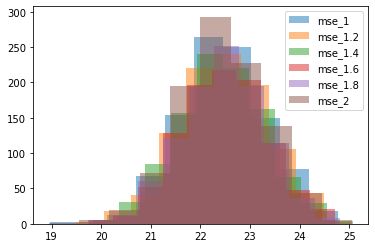

In [4]:
vary_multiply(1)

Mean: 22.428789299019936 Median: 22.443158437667517 Mode: [[19.49405943]] Variance: 0.7387231871222827
Mean: 22.450688048143913 Median: 22.478234153017368 Mode: [[20.01794854]] Variance: 0.7567711785140603
Mean: 22.475973357368883 Median: 22.462308113306186 Mode: [[19.59148758]] Variance: 0.7034417274558142
Mean: 22.433596113877208 Median: 22.469440936504142 Mode: [[18.65452687]] Variance: 0.7755727890887698
Mean: 22.46308235996006 Median: 22.437651078356033 Mode: [[19.83813911]] Variance: 0.7053715628846607
Mean: 22.456965970511888 Median: 22.429949791006745 Mode: [[20.01409849]] Variance: 0.6927300029407569


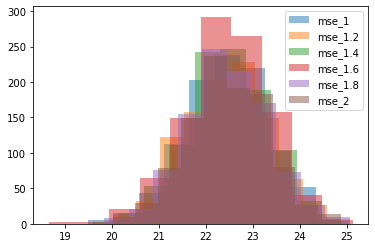

In [5]:
vary_multiply(2)

Mean: 22.442585814216596 Median: 22.46309199134661 Mode: [[19.00896662]] Variance: 0.7291822622305616
Mean: 22.463634965899768 Median: 22.47504426854131 Mode: [[19.87029676]] Variance: 0.7062109335047198
Mean: 22.4588663140848 Median: 22.436744072310184 Mode: [[18.96331669]] Variance: 0.7132551327546598
Mean: 22.43718939001475 Median: 22.44609532980396 Mode: [[19.75403705]] Variance: 0.7168144370450857
Mean: 22.40116526760911 Median: 22.43501105359123 Mode: [[18.88377128]] Variance: 0.7531348312280988
Mean: 22.466684512462145 Median: 22.446995381310515 Mode: [[19.59543444]] Variance: 0.7466081476323992


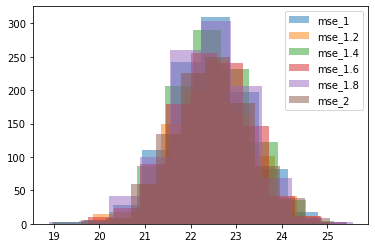

In [6]:
vary_multiply(3)

Mean: -2.219291864733957 Median: -2.199160437959117 Mode: [[-3.18660895]] Variance: 0.0652242121235197
Mean: -2.2259474122192375 Median: -2.200414943917819 Mode: [[-3.09324284]] Variance: 0.06393630443285364
Mean: -2.2242980200569975 Median: -2.1927364282832933 Mode: [[-3.17496681]] Variance: 0.06328747538059058
Mean: -2.2185610747274493 Median: -2.194097486285434 Mode: [[-3.18773625]] Variance: 0.06047261954839961
Mean: -2.2132901507505482 Median: -2.191815966836623 Mode: [[-3.00990887]] Variance: 0.0625994163777206
Mean: -2.216682631793868 Median: -2.185054009235227 Mode: [[-3.06318691]] Variance: 0.06651631766943664


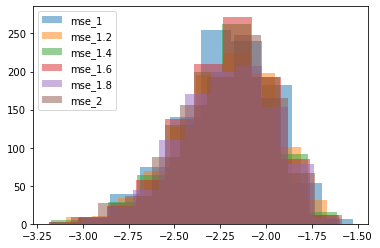

In [7]:
vary_multiply(4)

Mean: -1.4601687914329484 Median: -1.456058384846211 Mode: [[-1.75020796]] Variance: 0.006259156679523999
Mean: -1.7481917783438592 Median: -1.7456172363582247 Mode: [[-2.11271793]] Variance: 0.008320342251847001
Mean: -2.034088855209953 Median: -2.0287068183132284 Mode: [[-2.38696139]] Variance: 0.00975229639144473
Mean: -2.321609353003002 Median: -2.319193322033768 Mode: [[-2.67999925]] Variance: 0.011888175392565396
Mean: -2.6093121975607674 Median: -2.604605846882462 Mode: [[-3.00337437]] Variance: 0.013562350272371545
Mean: -2.896871112715893 Median: -2.8932645648865662 Mode: [[-3.35475075]] Variance: 0.016995412154732496


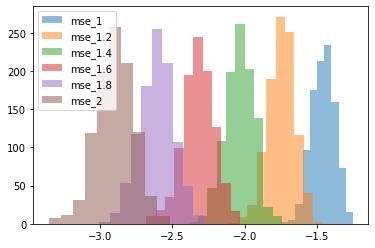

In [8]:
vary_multiply(5)

Mean: 1.9773120248897067 Median: 1.9579751912825776 Mode: [[1.05274612]] Variance: 0.11190600468473266
Mean: 1.303412858048332 Median: 1.299293952348405 Mode: [[-0.91911017]] Variance: 0.253078732065683
Mean: 0.4988524606441106 Median: 0.5233915303060248 Mode: [[-1.86946717]] Variance: 0.41742708124096345
Mean: -0.33234399137077153 Median: -0.3097625218333133 Mode: [[-2.63424432]] Variance: 0.5199570427267771
Mean: -1.1344752585527005 Median: -1.1376804877335578 Mode: [[-3.28932142]] Variance: 0.586771883059321
Mean: -1.793622785883819 Median: -1.8152985872800607 Mode: [[-3.91637315]] Variance: 0.5814722340680507


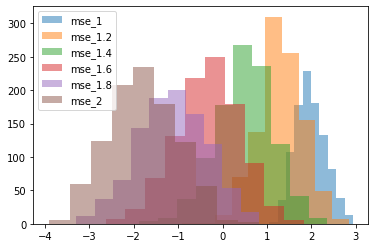

In [9]:
vary_multiply(6)